# EDA1 ASSIGNMENT


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame
df = pd.read_csv('Cardiotocographic.csv')


In [2]:
# Task 1: Data Cleaning and Preparation
#1.1 Handle missing values
print("Missing values before handling:\n", df.isnull().sum())

# Fill missing values with the mean of the respective columns
df.fillna(df.mean(), inplace=True)

print("Missing values after handling:\n", df.isnull().sum())

# 1.2 Identify and correct any inconsistencies in data types
print("Data types:\n", df.dtypes)

# Convert any string-based numerical columns to float (if applicable)
# df['column_name'] = df['column_name'].astype(float)

# 1.3 Detect and treat outliers
# Z-score method for outlier detection
from scipy import stats

z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]

print(f"Data shape after outlier removal: {df.shape}")


Missing values before handling:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
Missing values after handling:
 LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64
Data types:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object
Data shape after outlier removal: (1869, 14)


In [3]:
# Task 2: Statistical Summary
## Provide a statistical summary for each variable
summary = df.describe().T
summary['median'] = df.median()
summary['IQR'] = summary['75%'] - summary['25%']
print("Statistical Summary:\n", summary)


Statistical Summary:
            count          mean           std         min         25%  \
LB        1869.0  1.333070e+02  9.899631e+00  106.000000  126.000000   
AC        1869.0  3.193778e-03  3.767102e-03   -0.000185    0.000000   
FM        1869.0  4.239526e-03  1.355382e-02   -0.005106    0.000000   
UC        1869.0  4.390969e-03  2.904462e-03   -0.000132    0.002002   
DL        1869.0  1.732029e-03  2.705466e-03   -0.000124    0.000000   
DS        1869.0  3.736781e-08  6.367633e-07   -0.000007    0.000000   
DP        1869.0  1.018890e-04  4.043632e-04   -0.000045    0.000000   
ASTV      1869.0  4.687087e+01  1.683452e+01   11.799846   32.000000   
MSTV      1869.0  1.283173e+00  7.780992e-01    0.200000    0.700000   
ALTV      1869.0  9.193894e+00  1.657476e+01   -1.043619    0.000000   
MLTV      1869.0  8.329351e+00  5.226398e+00   -0.200788    4.900000   
Width     1869.0  6.893061e+01  3.761403e+01    7.000000   37.000000   
Tendency  1869.0  3.322644e-01  6.008302e-

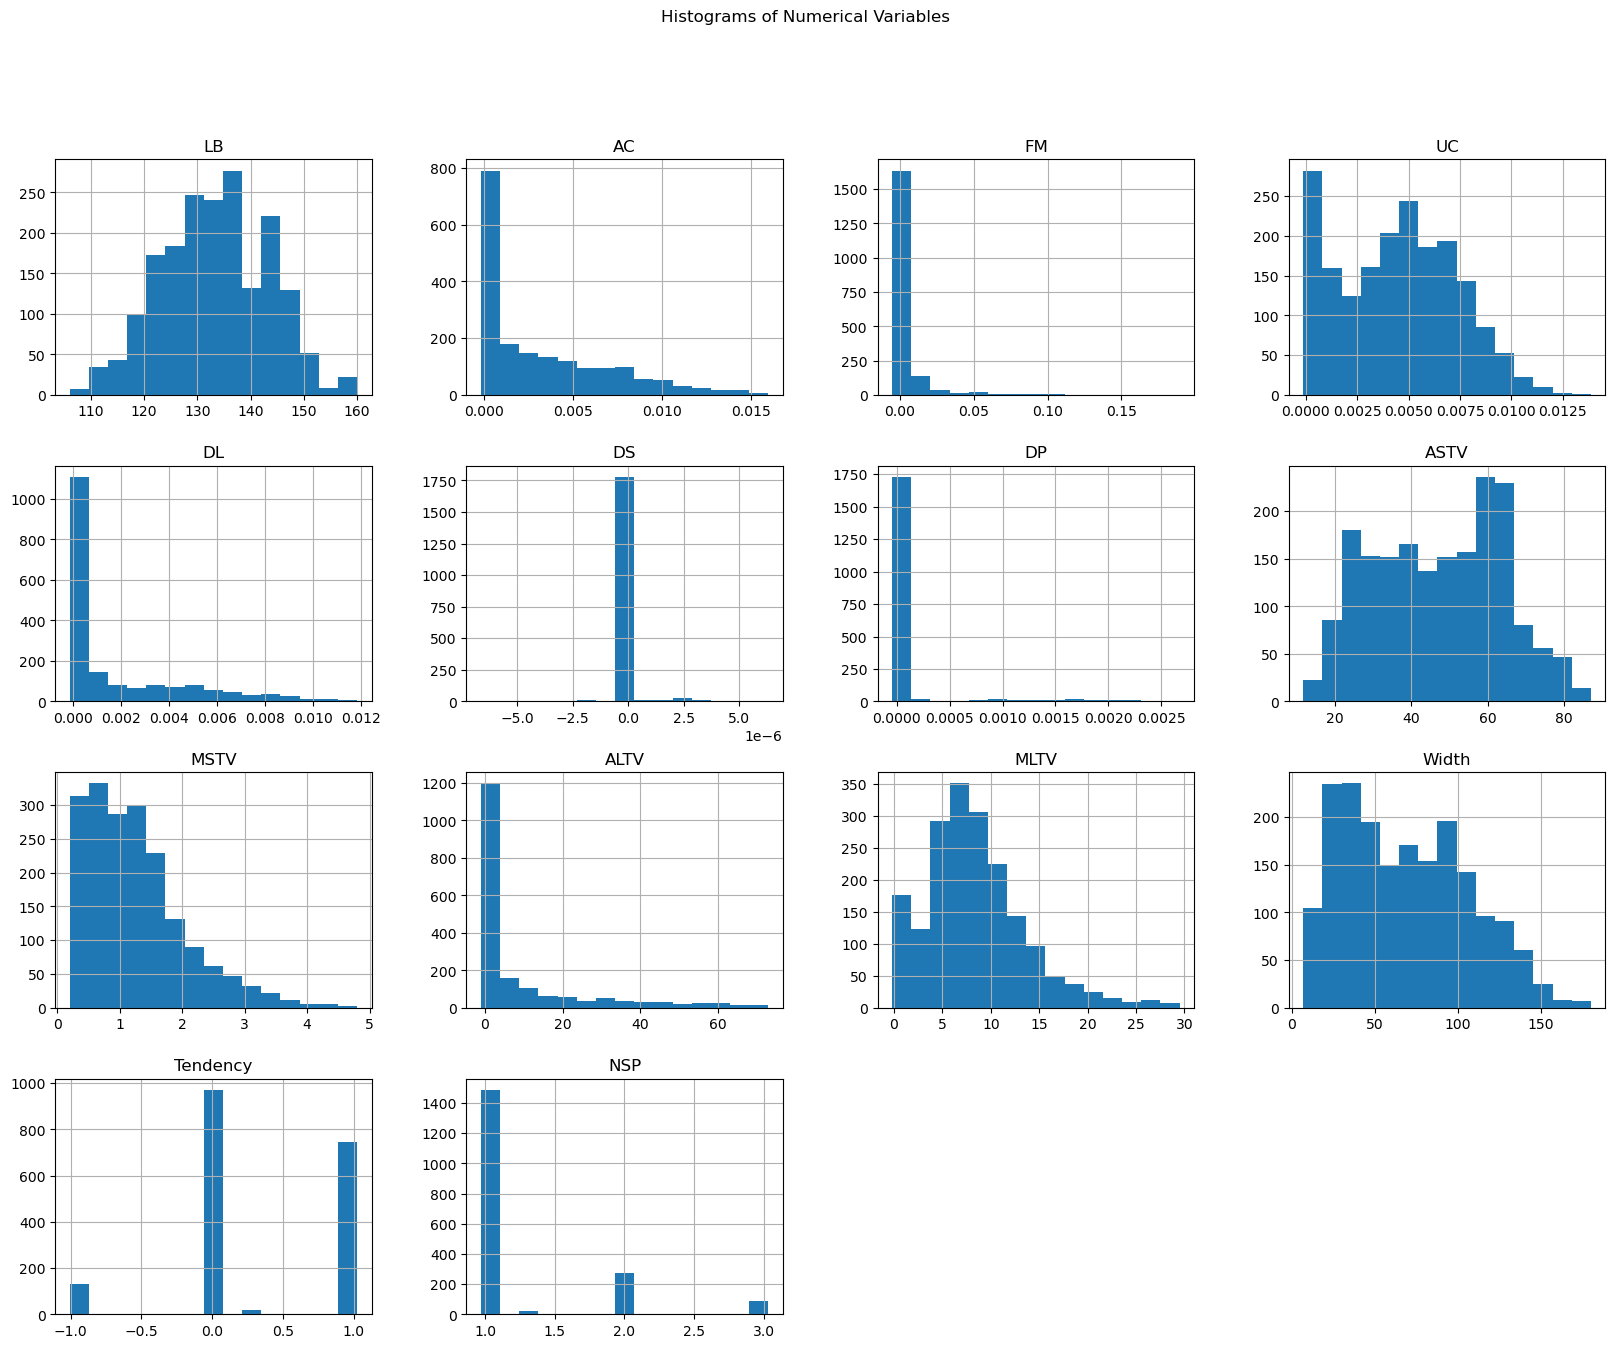

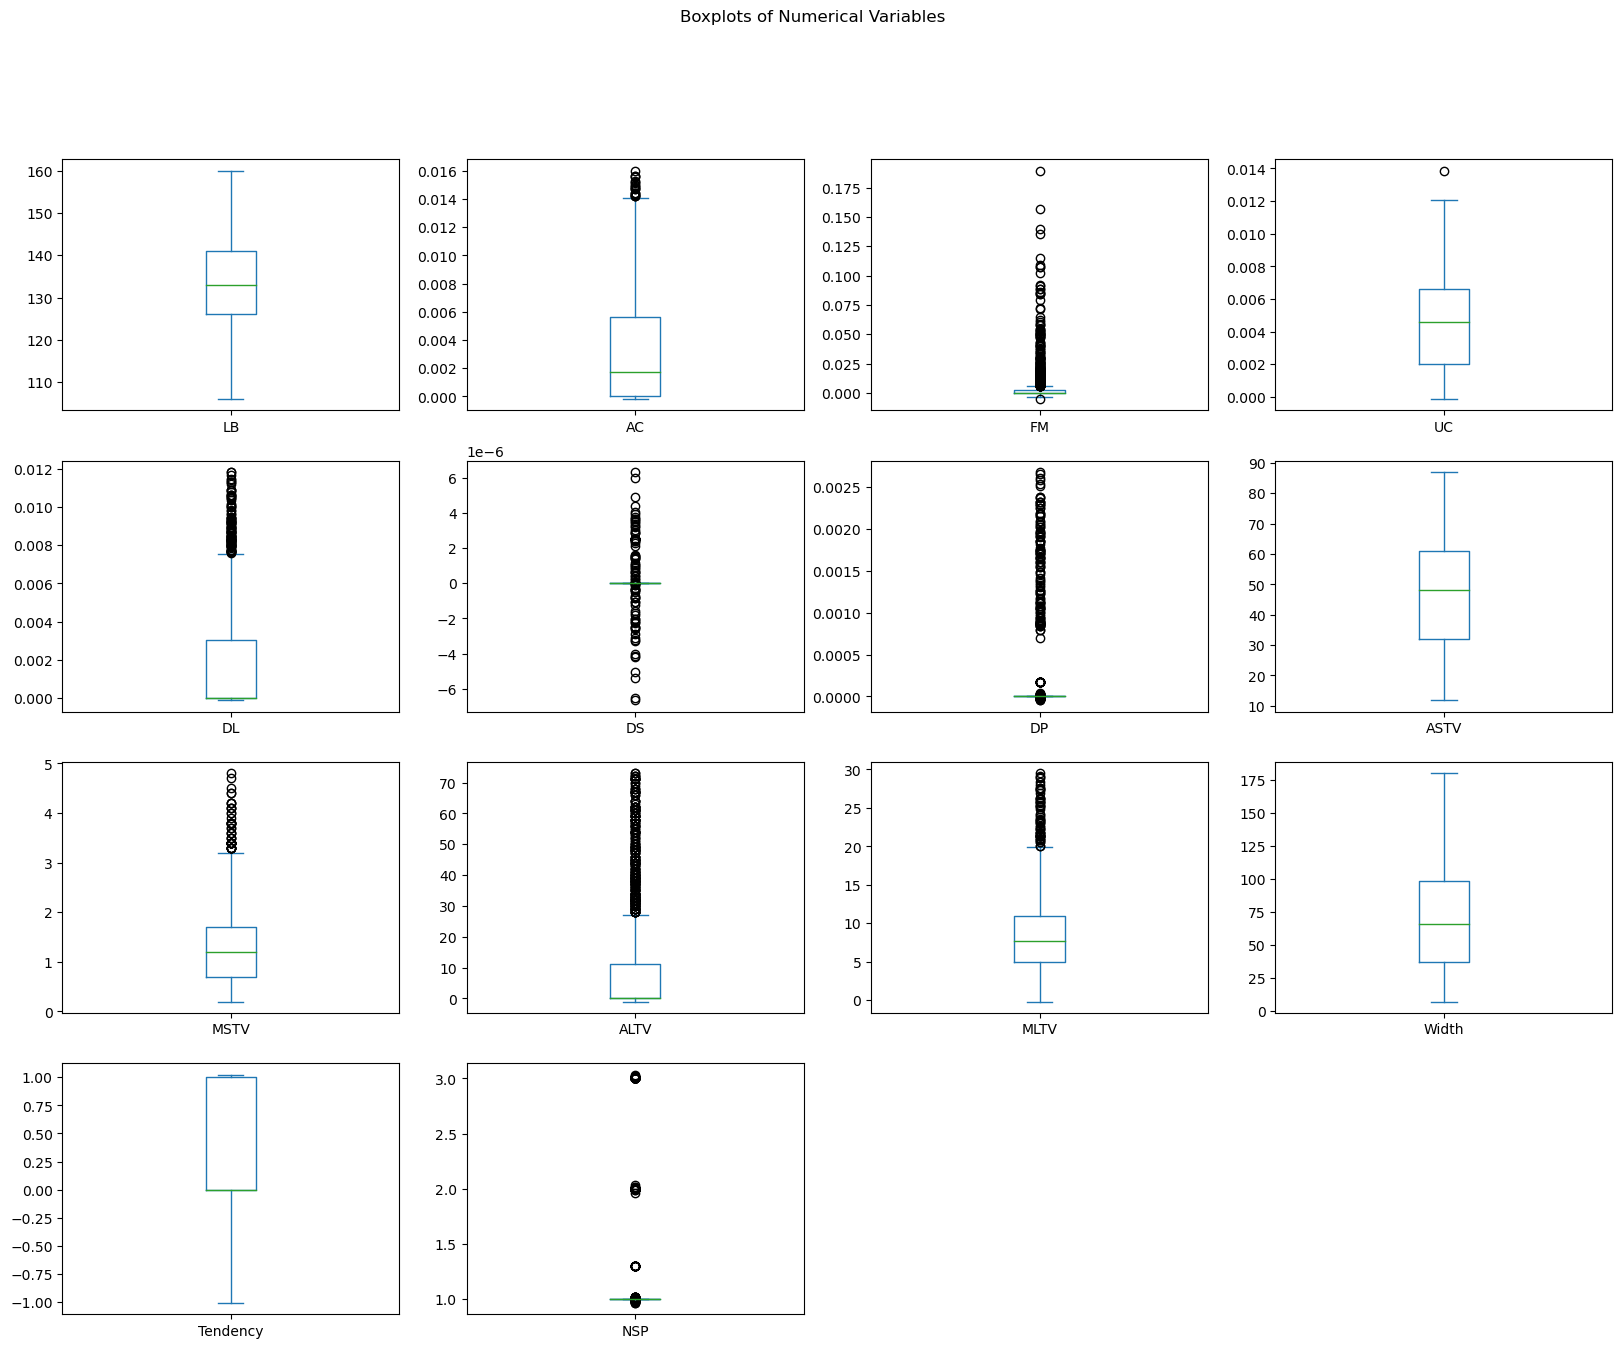

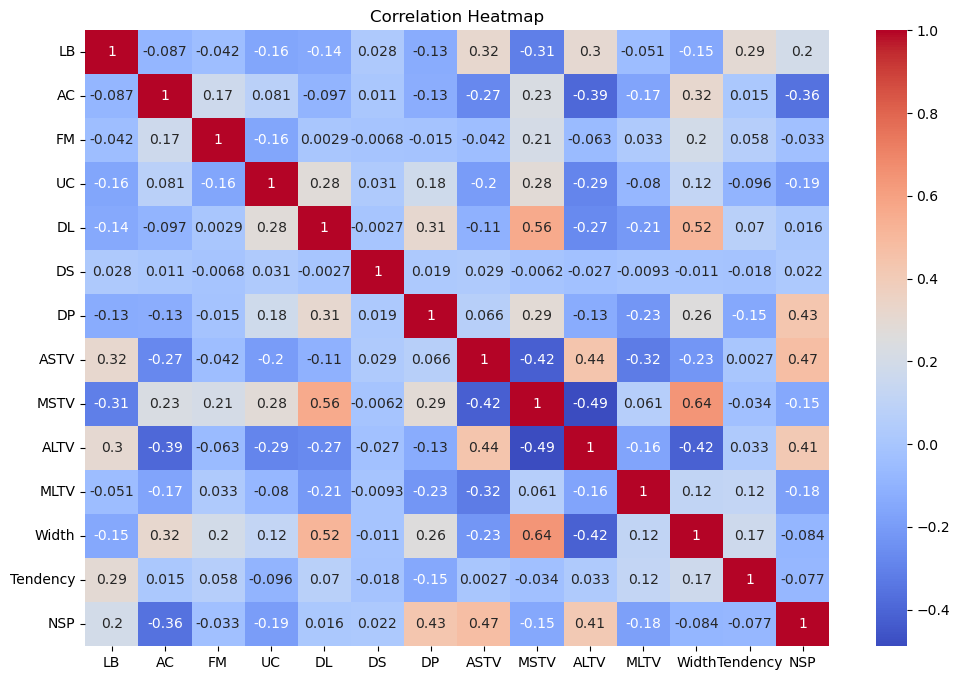

C:\Users\Omkar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


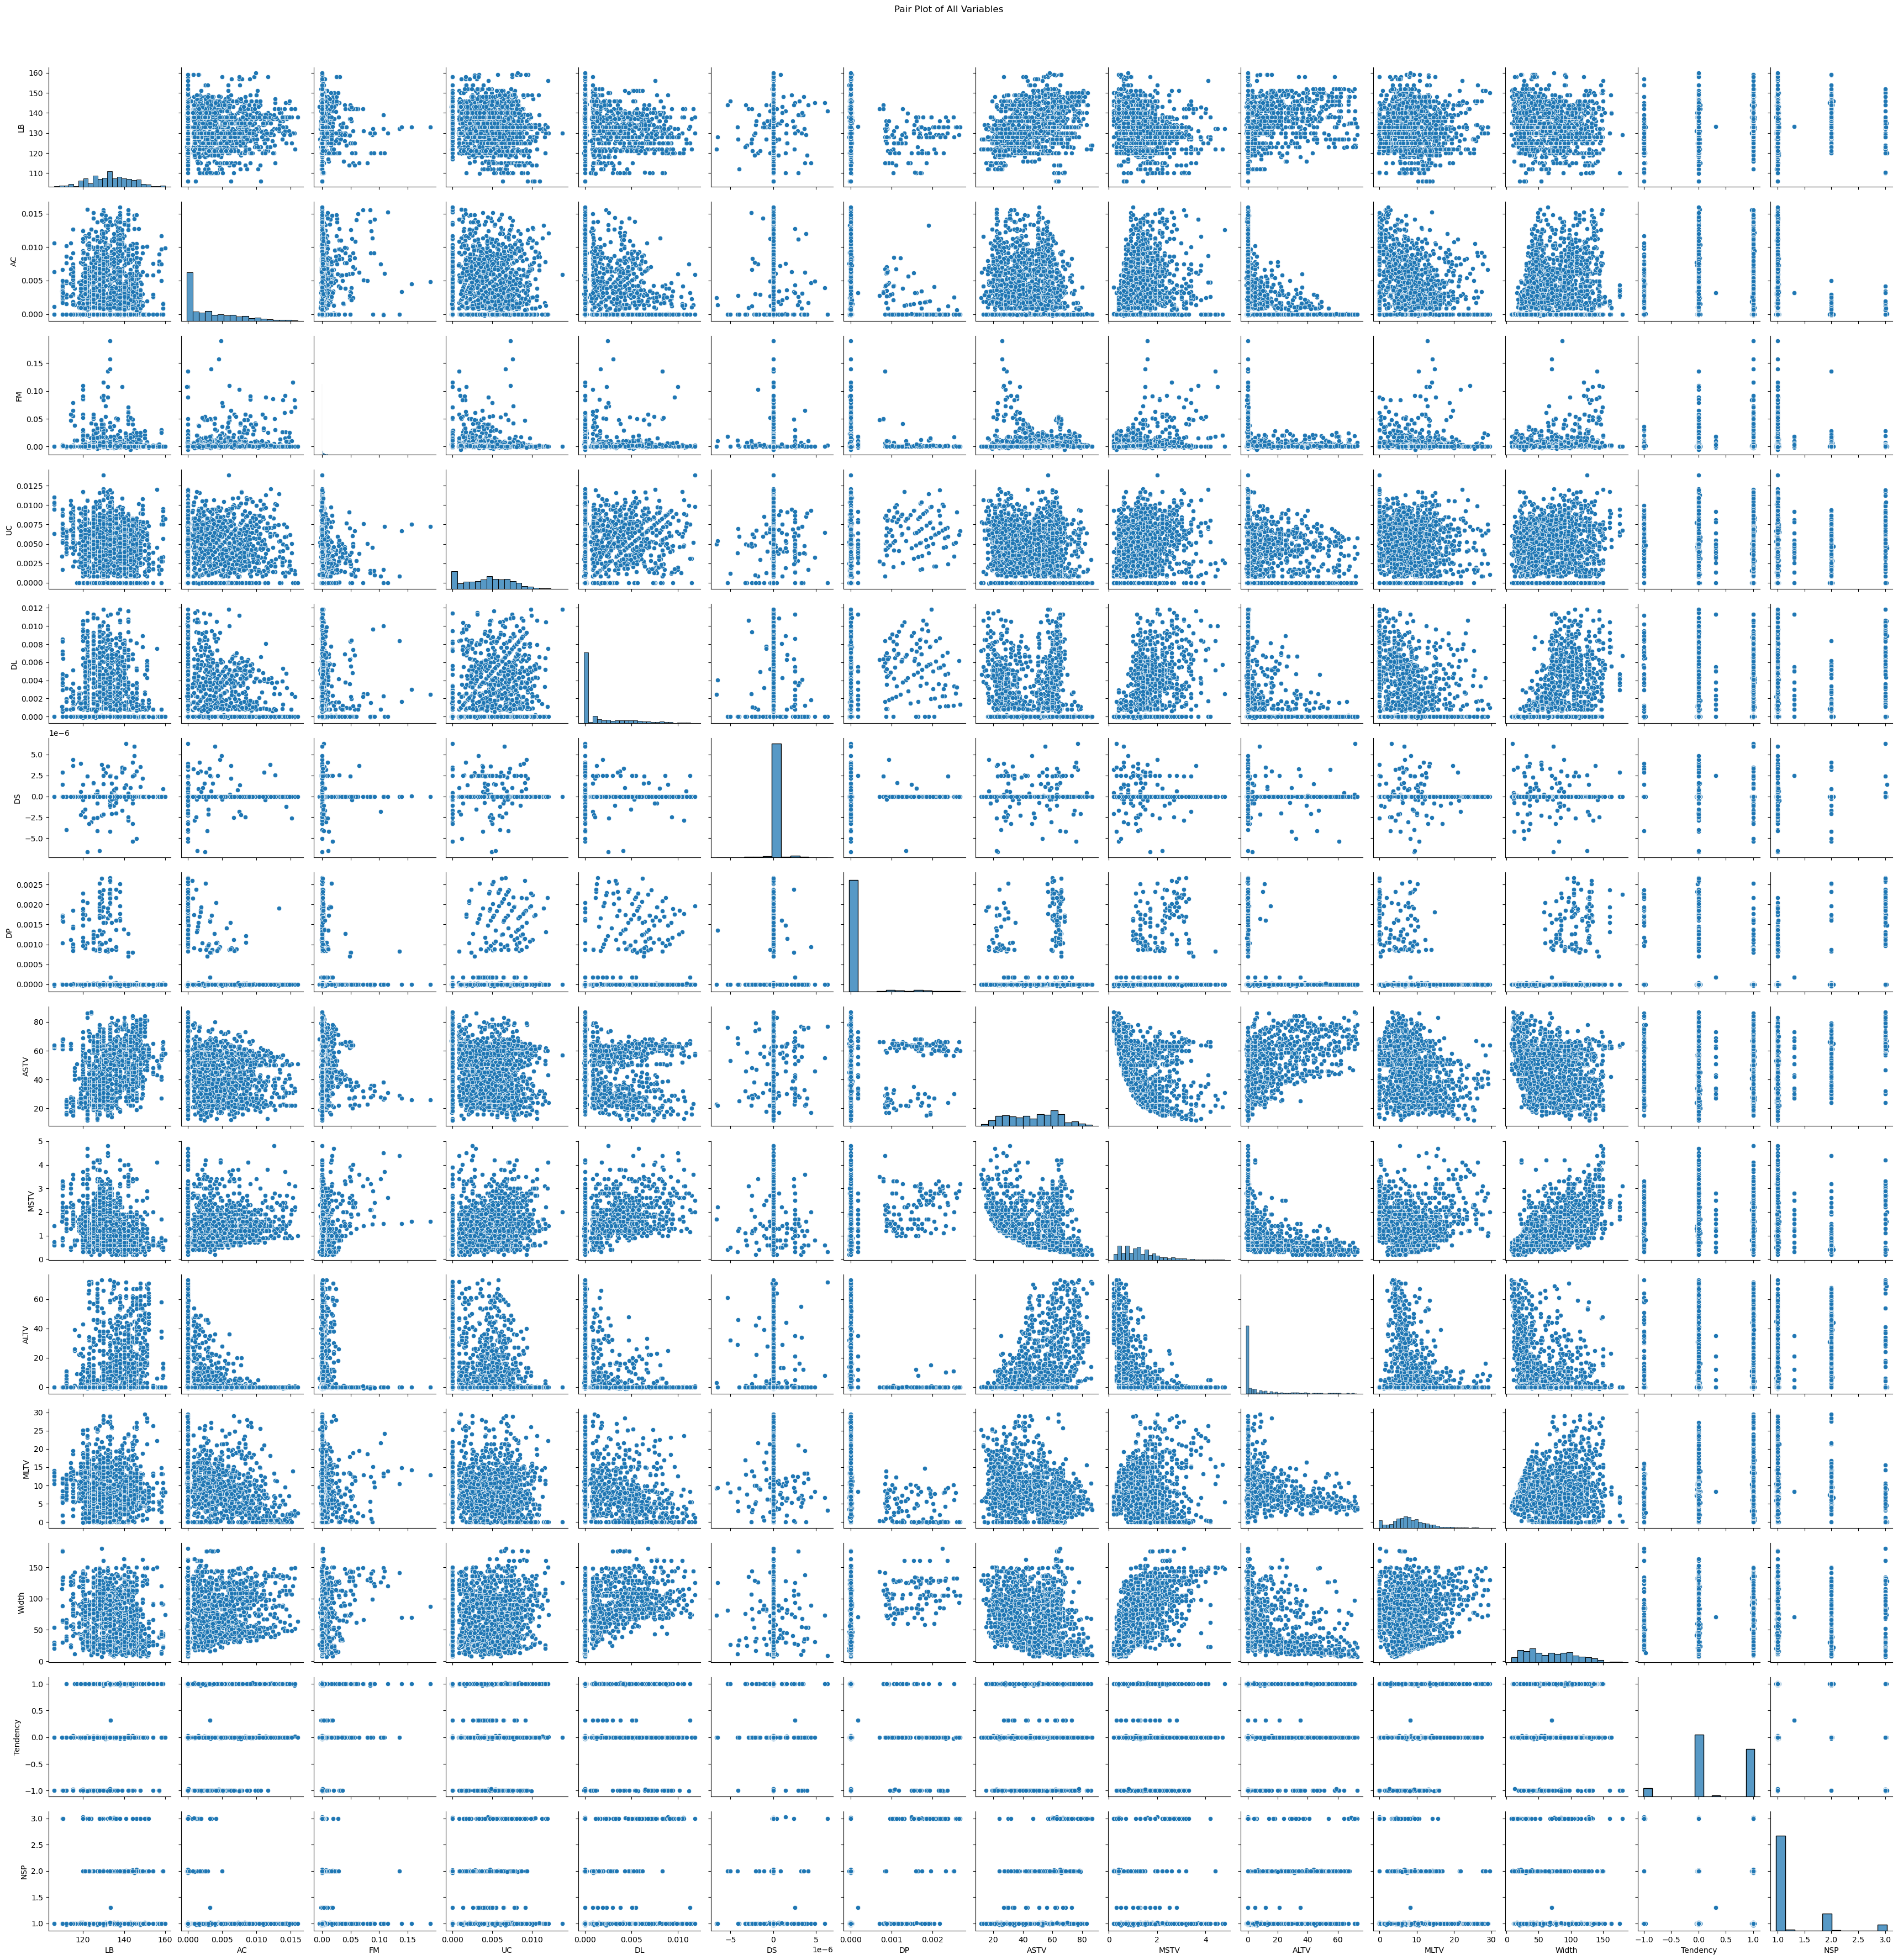

In [4]:
# Task 3: Data Visualization
# 3.1 Histograms and Boxplots
df.hist(bins=15, figsize=(20, 15))
plt.suptitle("Histograms of Numerical Variables")
plt.show()

df.plot(kind='box', subplots=True, layout=(4,4), figsize=(20,15))
plt.suptitle("Boxplots of Numerical Variables")
plt.show()

# 3.2 Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##
3.3 Pair Plot
sns.pairplot(df)
plt.suptitle("Pair Plot of All Variables", y=1.02)
plt.show()

In [5]:
# Task 4: Pattern Recognition and Insights
# Identify correlations
strong_corrs = corr_matrix[(corr_matrix >= 0.7) & (corr_matrix != 1.0)]
print("Strong correlations:\n", strong_corrs)


Strong correlations:
           LB  AC  FM  UC  DL  DS  DP  ASTV  MSTV  ALTV  MLTV  Width  Tendency  \
LB       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
AC       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
FM       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
UC       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DL       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DS       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DP       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
ASTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
MSTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
ALTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
MLTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
Width 

In [6]:
# Task 5: Conclusion
# Summarize the key insights
conclusion = """
- The dataset was cleaned by filling missing values with the mean and removing outliers based on the Z-score method.
- The statistical summary reveals the central tendency and dispersion of each variable.
- Histograms and boxplots provided insight into the distribution of the data and identified any remaining outliers.
- The correlation heatmap and pair plot helped identify strong correlations between certain variables.
"""
print(conclusion)


- The dataset was cleaned by filling missing values with the mean and removing outliers based on the Z-score method.
- The statistical summary reveals the central tendency and dispersion of each variable.
- Histograms and boxplots provided insight into the distribution of the data and identified any remaining outliers.
- The correlation heatmap and pair plot helped identify strong correlations between certain variables.

